In [2]:
# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 2. Load Data
train = pd.read_csv('C:\\Users\\USER\\Desktop\\HackerEarth_ML\\dataset\\train.csv')
test = pd.read_csv('C:\\Users\\USER\\Desktop\\HackerEarth_ML\\dataset\\test.csv')

# 3. Preprocessing
# Drop ID column
train = train.drop('ID', axis=1)
test_ID = test['ID']
test = test.drop('ID', axis=1)

# Separate target variable
y_train = train['carbon_footprint']
X_train = train.drop('carbon_footprint', axis=1)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Use OrdinalEncoder to encode categories safely
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols].astype(str))
test[categorical_cols] = encoder.transform(test[categorical_cols].astype(str))

# 4. Model Training
model = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=15)
model.fit(X_train, y_train)

# 5. Prediction on Test Data
y_test_pred = model.predict(test)

# 6. (Optional) Evaluation on Train Data
y_train_pred = model.predict(X_train)

print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Train R2 Score:", r2_score(y_train, y_train_pred))

# 7. Save Predictions
submission = pd.DataFrame({
    'ID': test_ID,
    'carbon_footprint': y_test_pred
})

submission.to_csv('submission.csv', index=False)





Train MAE: 18.698977576851597
Train RMSE: 29.061129648506252
Train R2 Score: 0.976709816283237


In [3]:
import joblib

# Save the model to a file
joblib.dump(model, 'cf_model.pkl')
print("Model saved successfully!")


Model saved successfully!


C:\Users\USER\AppData\Local\Temp\ipykernel_11140\3897356780.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


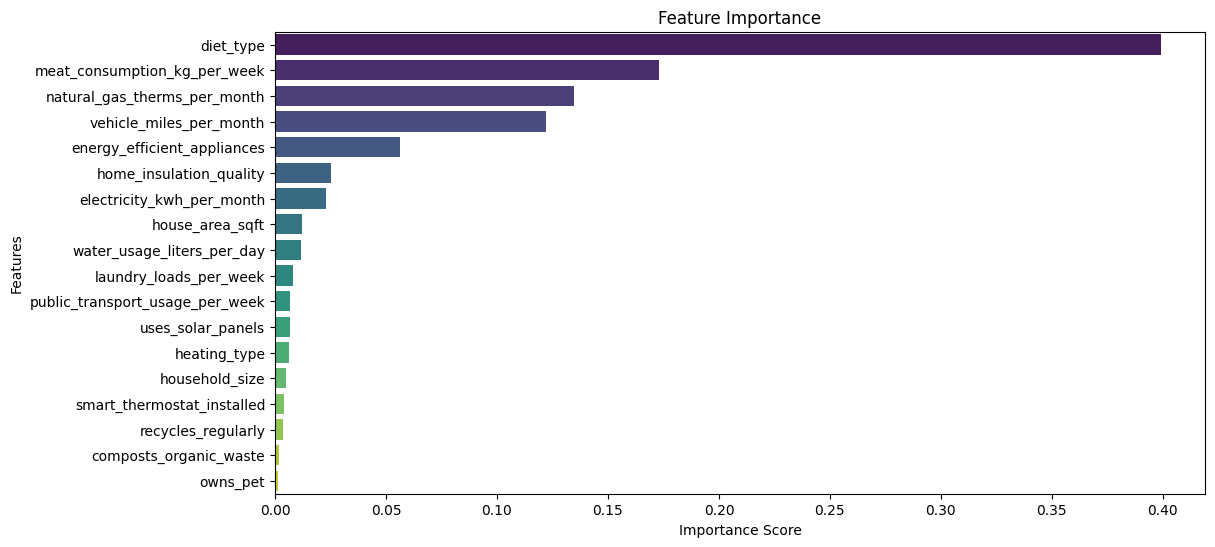

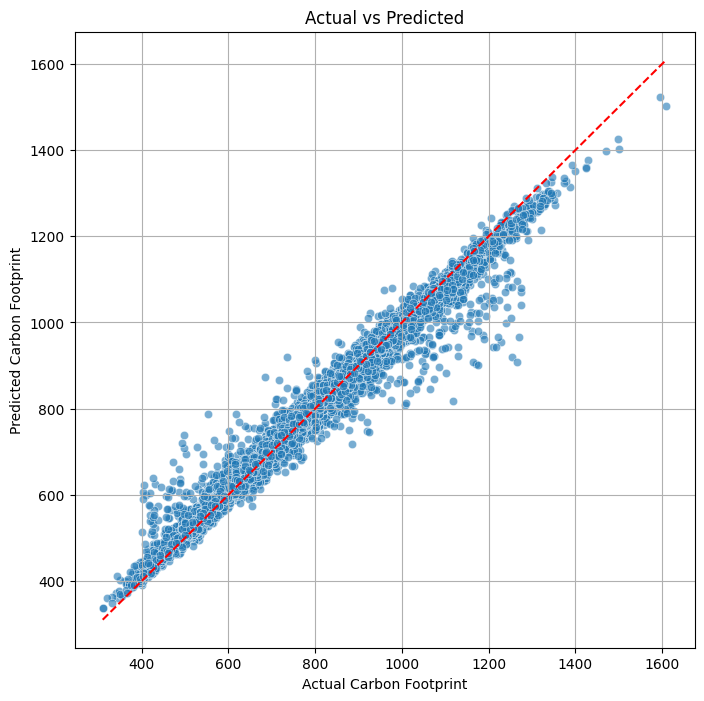

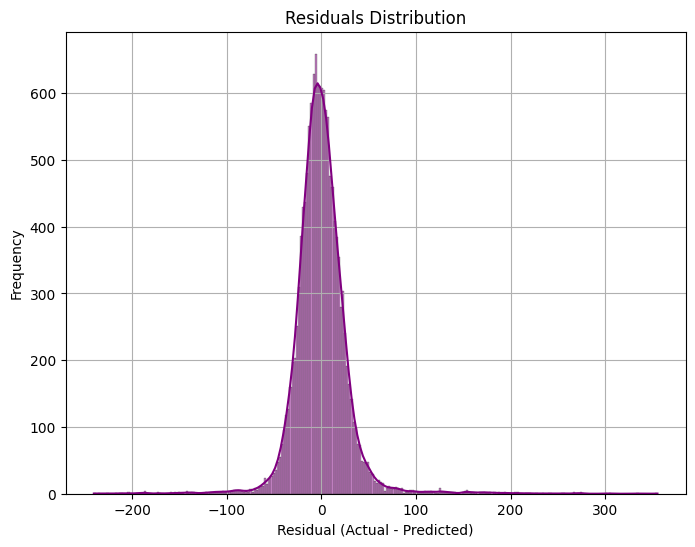

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Feature Importance Plot
importances = model.feature_importances_
features = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# 2. Actual vs Predicted Plot
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--') # ideal line
plt.xlabel('Actual Carbon Footprint')
plt.ylabel('Predicted Carbon Footprint')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

# 3. Residual Plot
residuals = y_train - y_train_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color="purple")
plt.title('Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
